### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [7]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 6 samples
Epoch 1/300
6/6 [==============================] - 2s 302ms/sample - loss: 35053.2539
Epoch 2/300
6/6 [==============================] - 0s 1ms/sample - loss: 34526.7383
Epoch 3/300
6/6 [==============================] - 0s 2ms/sample - loss: 34115.2148
Epoch 4/300
6/6 [==============================] - 0s 1ms/sample - loss: 33726.7383
Epoch 5/300
6/6 [==============================] - 0s 1ms/sample - loss: 33378.5195
Epoch 6/300
6/6 [==============================] - 0s 1ms/sample - loss: 33079.0703
Epoch 7/300
6/6 [==============================] - 0s 1ms/sample - loss: 32816.6445
Epoch 8/300
6/6 [==============================] - 0s 1ms/sample - loss: 32539.4375
Epoch 9/300
6/6 [==============================] - 0s 1ms/sample - loss: 32260.0547
Epoch 10/300
6/6 [==============================

Epoch 91/300
6/6 [==============================] - 0s 1ms/sample - loss: 18.3632
Epoch 92/300
6/6 [==============================] - 0s 2ms/sample - loss: 14.8887
Epoch 93/300
6/6 [==============================] - 0s 1ms/sample - loss: 15.4173
Epoch 94/300
6/6 [==============================] - 0s 1ms/sample - loss: 18.7131
Epoch 95/300
6/6 [==============================] - 0s 1ms/sample - loss: 23.6749
Epoch 96/300
6/6 [==============================] - 0s 1ms/sample - loss: 29.2819
Epoch 97/300
6/6 [==============================] - 0s 2ms/sample - loss: 34.5799
Epoch 98/300
6/6 [==============================] - 0s 1ms/sample - loss: 38.9060
Epoch 99/300
6/6 [==============================] - 0s 1ms/sample - loss: 41.8097
Epoch 100/300
6/6 [==============================] - 0s 2ms/sample - loss: 43.3200
Epoch 101/300
6/6 [==============================] - 0s 1ms/sample - loss: 43.4555
Epoch 102/300
6/6 [==============================] - 0s 1ms/sample - loss: 42.3355
Epoch 103/300

Epoch 190/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.1388
Epoch 191/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.1299
Epoch 192/300
6/6 [==============================] - 0s 2ms/sample - loss: 13.1199
Epoch 193/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.1153
Epoch 194/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.1088
Epoch 195/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.1003
Epoch 196/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.0915
Epoch 197/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.0826
Epoch 198/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.0736
Epoch 199/300
6/6 [==============================] - 0s 2ms/sample - loss: 13.0652
Epoch 200/300
6/6 [==============================] - 0s 2ms/sample - loss: 13.0580
Epoch 201/300
6/6 [==============================] - 0s 1ms/sample - loss: 13.0531
Epoc

Epoch 289/300
6/6 [==============================] - 0s 2ms/sample - loss: 12.1993
Epoch 290/300
6/6 [==============================] - 0s 1ms/sample - loss: 12.1896
Epoch 291/300
6/6 [==============================] - 0s 1ms/sample - loss: 12.1805
Epoch 292/300
6/6 [==============================] - 0s 2ms/sample - loss: 12.1732
Epoch 293/300
6/6 [==============================] - 0s 2ms/sample - loss: 12.1639
Epoch 294/300
6/6 [==============================] - 0s 1ms/sample - loss: 12.1530
Epoch 295/300
6/6 [==============================] - 0s 2ms/sample - loss: 12.1479
Epoch 296/300
6/6 [==============================] - 0s 1ms/sample - loss: 12.1353
Epoch 297/300
6/6 [==============================] - 0s 1ms/sample - loss: 12.1278
Epoch 298/300
6/6 [==============================] - 0s 1ms/sample - loss: 12.1184
Epoch 299/300
6/6 [==============================] - 0s 1ms/sample - loss: 12.1086
Epoch 300/300
6/6 [==============================] - 0s 2ms/sample - loss: 12.1007


### Predicting For the next 10 data

In [8]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[230.909]
1 day input [196.         210.         230.90899658]
1 day output [[245.03847]]
2 day input [210.         230.90899658 245.03846741]
2 day output [[264.17093]]
3 day input [230.909   245.03847 264.17093]
3 day output [[286.70245]]
4 day input [245.03847 264.17093 286.70245]
4 day output [[306.50616]]
5 day input [264.17093 286.70245 306.50616]
5 day output [[330.7014]]
6 day input [286.70245 306.50616 330.7014 ]
6 day output [[357.05603]]
7 day input [306.50616 330.7014  357.05603]
7 day output [[383.22748]]
8 day input [330.7014  357.05603 383.22748]
8 day output [[413.28958]]
9 day input [357.05603 383.22748 413.28958]
9 day output [[445.39255]]
[230.909, 245.03847, 264.17093, 286.70245, 306.50616, 330.7014, 357.05603, 383.22748, 413.28958, 445.39255]


In [9]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [10]:
len(timeseries_data)

9

In [11]:
lst_output

[230.909,
 245.03847,
 264.17093,
 286.70245,
 306.50616,
 330.7014,
 357.05603,
 383.22748,
 413.28958,
 445.39255]

### Visualizaing The Output

In [12]:
import matplotlib.pyplot as plt

In [13]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

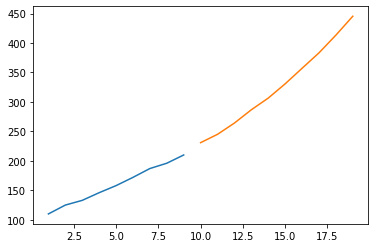

In [14]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
